# The naïve Bayes classifier

Max Collard, May 2021

## 4. All models are wrong; some are useful

### Modeling the data

The problem with the "perfect" Bayes classifier is that in most cases, especially in biology, there is **no way to know the truth about how the data are generated**; that is, we can never *truly know* the probabilities

$$
\begin{eqnarray*}
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathrm{Pr}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

This knowledge was **explicitly necessary** to make the "optimal" Bayes classifier; so, in general, the Bayes classifier is **impossible to obtain**.

Instead, we will have to satisfy ourselves with coming up with some kind of **imperfect model** for how *we think* the data were generated; let's call the probabilities in this model

$$
\begin{eqnarray*}
&& \mathcal{M}(\mathcal{D} \mid \textrm{direction} = \textrm{Left}) \\
&& \mathcal{M}(\mathcal{D} \mid \textrm{direction} = \textrm{Right})
\end{eqnarray*}
$$

Thinking of $\mathrm{Pr}$ as a "perfect ruler" that measures the "size" of the part of the multiverse we observed that we live in, we can think of $\mathcal{M}$ as being a **really badly manufactured ruler**: it won't get us the exact right answer, but as long as it isn't *too bad*, we can still draw some conclusions from the measurements we get from it.

A perfect ruler ([from NIST](https://www.nist.gov/si-redefinition/meter#:~:text=Building%20upon%20these%20and%20other,per%20second%20in%20a%20vacuum.)):

<img src="images/4/nist-library-us-prototype-meter-bar-color_hr_1.jpg" />

What we use in science:

<img src="images/4/vintage+wooden+school+rulers+1.jpg" />

### The Poisson process: The default model for neuronal firing

It's 8:05am. You've got class at 9. The last shuttle that will get you there on time leaves at 8:20. You do your best to get ready, get out the door, and bolt to the bus stop, but you live in the part of the multiverse where you arrived at 8:24, so you're out of luck. But the bus comes on a schedule that you know runs every 15 minutes; since it's 8:24, four minutes late, you *know* that another bus will be there in 11 minutes, at 8:35. Put in Bayesian terms, *given the knowledge* that you are 4 minutes late, you *believe* that the bus will arrive in 11 minutes. Not great, but you will probably be forgiven.

There is, however, another world—a dark and scary world—called **Poisson** land. In Poisson land, everything is *reliable on average*, but nothing is *predictable*. What do I mean by this? Well, let's say you got to the bus stop at 8:24, and the last bus left at 8:20, just like in the first scenario. In Poisson land, you know that *on average*, in all possible worlds, the bus will get there 15 minutes after 8:20. But this is where the similarities end. In Poisson land, **knowing that the bus left 4 minutes ago tells you nothing about when the next bus will be there**; that is, the bus' arrival time is **independent of when the last bus arrived**. The next bus might be there in five seconds; it might be there in five years. But here's the weird part about Poisson land: now that it's 8:24, *on average*, the next bus will still come *in 15 minutes*, at 8:39. Even if you knew you had been waiting at the stop for 20 years without a bus coming, your *belief* about when the next bus would come would still be the same—*15 more minutes*.

This is the primary property of the **Poisson process** as a model of when "events" (like bus arrivals, or neuronal action potentials) occur: event occurrences are **independent of the history of previous events**. In fact, the only thing that the events *actually do* depend on is the **average rate of events happening**—in the above example, one bus per 15 minutes.

This model is completely absurd—we don't live in a world that behaves anything like Poisson land. However, it is an extremely **useful** model because it is *so unrestrictive* about the way in which events happen. In the context of spiking neurons, the model *only* makes the assumption that the neuron fires at a particular rate, say 15 times per second. In a certain sense, the events are placed "*as randomly as possible*" under the assumption that the neuron has to fire 15 times per second.

---

Let's think back to our T maze example: again, the mouse goes left or right, and we record the number of spikes that happen in five hippocampal neurons before the mouse makes that choice. Let's say that this mouse is *extremely* well-trained, and every single trial, it takes *exactly the same amount of time* to make its choice, say, 10 seconds. Let's think about what would happen if neuron 1 lived in "Poisson land", with spikes happening "totally randomly" at a rate of 10 spikes per second. In this case, because of the math of Poisson land, over many trials, the number of spikes produced by neuron 1 inside of that 10 second window would follow a **Poisson distribution** (hence the name "Poisson process"). In this case, the *average number of spikes* we would expect from neuron 1 would be its spike rate, 10 spikes per second, *times* the amount of time we observed the neuron for, 10 seconds: this is

$$ 10 \frac{\textrm{spikes}}{\textrm{second}} \times 10 \textrm{ seconds} = 100 \textrm{ spikes} $$

There is, though, some variability: in some trials, the neuron might fire 80 spikes; in others, it might fire 120. We can use `scipy` to show us what this distribution looks like:

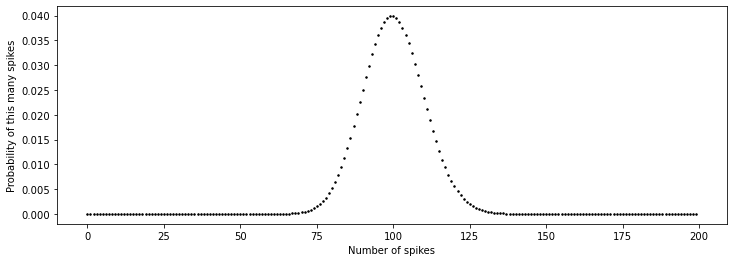

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

average_spikes = 100
n_test = np.arange( 0, 200 )
# pmf means "probability mass function"
p_test = stats.poisson.pmf( n_test, average_spikes )

plt.figure( figsize = (12, 4) )

plt.plot( n_test, p_test, 'k.', markersize = 3 )

plt.ylabel( 'Probability of this many spikes' )
plt.xlabel( 'Number of spikes' )

plt.show()

### Graphical models: A visual way to think about dependence

$\ldots$ (TODO)